# Lecture 16: Estimation

In [33]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Estimating enemy planes

In [34]:
N = 300
serialno = Table().with_column('Serial number', np.arange(N)+1)
serialno

Serial number
1
2
3
4
5
6
7
8
9
10


In [39]:
serialno.sample(30).column(0).max()

289

### Interlude:  appending to arrays

In [40]:
a = make_array(1, 2, 3, 4, 5)
a

array([1, 2, 3, 4, 5])

In [41]:
np.append(a, 42)

array([ 1,  2,  3,  4,  5, 42])

In [42]:
a

array([1, 2, 3, 4, 5])

In [43]:
a = np.append(a, 42)
a

array([ 1,  2,  3,  4,  5, 42])

What is the result of this code?

```
x = make_array(100, 42, 7)
x = np.append(x, 0)
x = np.append(x, 1)
x
```

A. `array([100, 42, 7])`  
B. `array([1, 0, 100, 42, 7, 0, 1])`  
C. `array([100, 42, 7, 0, 1])`  
D. I don't know  
E. none of the above  

In [44]:
x = make_array(100, 42, 7)
x = np.append(x, 0)
x = np.append(x, 1)
x

array([100,  42,   7,   0,   1])

### Simulation of estimation with max

In [50]:
sample_size = 10
repetitions = 750

maxes = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    statistic = sampled_numbers.max()
    maxes = np.append(maxes, statistic)

estimates = Table().with_column('Sample Max', maxes)
estimates

Sample Max
232
296
300
274
285
299
295
282
272
263


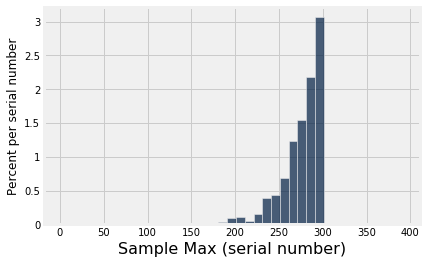

In [51]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

What would happen if we changed sample size to 10 instead of 30?

A. The histogram would spread out, with more area to the left of 300.  
B. The histogram would spread out, with more area to the right of 300.  
C. The histogram would compress, with more area concentrated around 300.  
D. I don't know  
E. None of the above  

### Simulation of estimate with average

In [52]:
2*np.mean(np.arange(1, 300+1))

301.0

In [53]:
sample_size = 30
repetitions = 750

double_averages = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    statistic = 2 * sampled_numbers.mean()
    double_averages = np.append(double_averages, statistic)

estimates = Table().with_columns(
    '2 * average', double_averages
)

estimates

2 * average
306.533
310.667
258.4
294.667
277.4
291.267
294.667
281.067
321.8
279


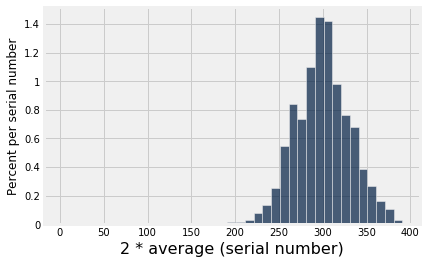

In [54]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

### Comparison of statistics

In [55]:
sample_size = 30
repetitions = 750

maxes = make_array()
double_averages = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  
    double_averages = np.append(double_averages, 2 * sampled_numbers.mean())

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', double_averages
)

estimates

Max,2 * average
281,277.4
296,273.533
300,282.333
299,294.2
269,314.333
290,313.4
295,281.2
284,251.267
299,346.4
299,326.6


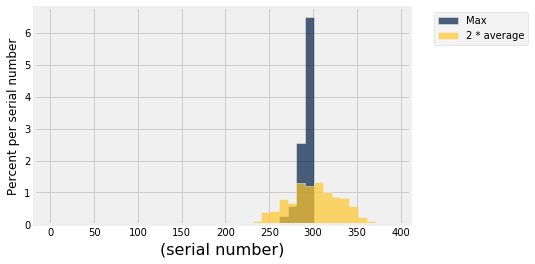

In [56]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

**Discussion question:** which estimate would be better for the Allies?